# SDSS/BOSS DR12 2pt cosmological analysis
In *~minutes* on the laptop with `PyBird-JAX`, cf. [2507.20990](https://arxiv.org/abs/2507.20990)

- Data: SDSS/BOSS DR12 LRGs, 4 skycuts, low-z (0.2 < z < 0.43) and high-z (0.43 < z < 0.7), north and south each, 
    - cf. [1509.06529](https://arxiv.org/abs/1509.06529)<--[Overview & Results], [1509.06529](https://arxiv.org/abs/1509.06529)<--[Catalogs], [1509.06400](https://arxiv.org/abs/1509.06400)<--[Patchy mocks for covariance]
    - re-analysed in [1909.05271](https://arxiv.org/abs/1909.05271)<--[First $P_\ell(k)$ EFT full-shape analysis], [1909.07951](https://arxiv.org/abs/1909.07951)<--[companion paper], [2110.00016](https://arxiv.org/abs/2110.00016)<--[$P\!\!\!\!/+w_\ell$], [2110.07539](https://arxiv.org/abs/2110.07539)<--[$\xi_\ell(s)$ re-measured here], [2206.08327](https://arxiv.org/abs/2206.08327)<--[$P_\ell(k)$ re-measured here]
- Model: 2pt galaxies in redshift space from one-loop EFTofLSS + observational effects, cf. [1610.09321](https://arxiv.org/abs/1610.09321), [1909.05271](https://arxiv.org/abs/1909.05271), [2110.00016](https://arxiv.org/abs/2110.00016)
- Priors: 
    - flat on cosmological parameters and $b_1$
    - $\mathcal{N}(0, 5)$: Gaussians centred on $0$ with standard deviation of $5$ on nonlinear EFT parameters $c_2 = (b_2 + b_4)/\sqrt{2}, b_3, c_{\rm ct}, c_{r,1}, c_{r,2}, c_{\epsilon,1}, c_{\epsilon,2}, c_{r,4}, c_{r,6}$
    - $\mathcal{N}(0, 2)$ on $c_{\epsilon,0}$ (shot noise)
    - $k_{\rm NL} = k_{\rm M} = 0.7 \, h/\textrm{Mpc} \, , \quad k_{\rm R} = 0.25 \, h/\textrm{Mpc} \, , \quad \bar n = 3 \cdot 10^{-4} \, (\textrm{Mpc}/h)^3$ 

#### **Libraries import**

In [1]:
import os, sys
import matplotlib.pyplot as plt
import yaml

In [2]:
from getdist import loadMCSamples, plots, mcsamples, MCSamples
from pybird.run import Run

#### **Data, likelihood, and run configurations**

**Directory paths**

In [3]:
rootdir = "../"
datadir = os.path.join(rootdir, 'data', 'eftboss')
outdir = os.path.join(datadir, 'out')

**Likelihood configuration**

In [4]:
configname = 'boss_pk_fast'  
likelihood_config = yaml.full_load(open(os.path.join(datadir, 'likelihood_config', f'{configname}.yaml'), 'r'))
print(yaml.dump(likelihood_config, indent=4, sort_keys=False))

data_path: ../data/eftboss/
data_file: boss_dr12_2pt.h5
with_emu: true
output: bPk
multipole: 3
with_wedge: false
wedge_type: PA-w1-w2
with_bao_rec: false
with_ap: true
with_survey_mask: true
sky:
    cmass_ngc:
        min:
        - 0.01
        - 0.01
        - 0.01
        max:
        - 0.2
        - 0.2
        - 0.2
    cmass_sgc:
        min:
        - 0.01
        - 0.01
        - 0.01
        max:
        - 0.2
        - 0.2
        - 0.2
    lowz_ngc:
        min:
        - 0.01
        - 0.01
        - 0.01
        max:
        - 0.2
        - 0.2
        - 0.2
    lowz_sgc:
        min:
        - 0.01
        - 0.01
        - 0.01
        max:
        - 0.2
        - 0.2
        - 0.2
write:
    save: false
    fake: false
    plot: false
    show: false
    out_path: ../data/eftboss/out/
    out_name: boss_pk_eft
km: 0.7
kr: 0.25
nd: 0.0003
eft_basis: westcoast
with_stoch: true
with_nnlo_counterterm: true
with_loop_prior: false
eft_prior:
    b1:
        type: flat
    c2

**Run configuration**

In [5]:
configname = 'run_fast'
run_config = yaml.full_load(open(os.path.join(datadir, 'run_config', '%s.yaml') % configname, 'r'))
run_config['boltzmann'] = 'Symbolic' 
run_config['free_cosmo_name'] = ['omega_cdm', 'h', 'ln10^{10}A_s']
print(yaml.dump(run_config, indent=4, sort_keys=False))

free_cosmo_name:
- omega_cdm
- h
- ln10^{10}A_s
fiducial_cosmo:
    omega_b: 0.02235
    omega_cdm: 0.12
    h: 0.675
    ln10^{10}A_s: 3.044
    n_s: 0.965
jax_jit: true
taylor: true
vectorize: true
boltzmann: Symbolic
minimizers:
- minuit
- adam
samplers:
- fisher
- emcee



## **$P_\ell(k)$ analysis**

$k_{\rm max}^\ell = 0.2 h/{\rm Mpc}$

**Initialisation**


In [6]:
R = Run(run_config, likelihood_config, outdir, verbose=True)

free_cosmo_name: ['omega_cdm', 'h', 'ln10^{10}A_s']
fiducial_cosmo: {'omega_b': 0.02235, 'omega_cdm': 0.12, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}
cosmo_prior: False
ext_probe: False
ext_loglkl: None
measure: False
taylor_measure: False
debiasing: False
hessian_type: None
vectorize: True
emulate: None
taylor: True
jax_jit: True
order: 3
boltzmann: Symbolic
'vectorize' or 'taylor' is True, setting 'jax_jit' to True
jax: on
reading data file: ../data/eftboss/boss_dr12_2pt.h5
-----------------------
sky: cmass_ngc
output: bPk
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.2, 0.2, 0.2]
coordinate (AP) distortion: on
survey mask: on
-----------------------
-----------------------
sky: cmass_sgc
output: bPk
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.2, 0.2, 0.2]
coordinate (AP) distortion: on
survey mask: on
-----------------------
-----------------------
sky: lowz_ngc
output: bPk
multipole: 3
m

**Minimisation and sampling**

Posterior mode search

Relatively slow since we use nor emulator nor Taylor expansion to ensure accurate point estimates

In [7]:
R.c.update({'emulate': False, 'taylor': False}) # no emu nor Taylor when minimising to ensure accurate point estimates
minimizers = ['minuit', 'minuit'] # twice, to check convergence
mode_pk = R.run(minimizers=minimizers, output=True, verbose=True)

----- minimisation with minuit -----
Emulator: off


/Users/pierre/Library/Python/3.13/lib/python/site-packages/jax/_src/interpreters/mlir.py:1171: UserWarning: A large amount of constants were captured during lowering (3.19GB total). If this is intentional, disable this warning by setting JAX_CAPTURED_CONSTANTS_WARN_BYTES=-1. To obtain a report of where these constants were encountered, set JAX_CAPTURED_CONSTANTS_REPORT_FRAMES=-1.
  warnings.warn(message)


minimisation starts...
minimisation done in 151.122 sec.
min chi2: 185.831, ndata: 216, dof: 196, p-value: 0.688
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.118 0.676 3.089 1.86  0.182 1.987 0.781 1.857 0.888 1.888 1.587]
----- minimisation with minuit -----
starting from previously found best-fit
minimisation starts...
minimisation done in 39.999 sec.
min chi2: 185.831, ndata: 216, dof: 196, p-value: 0.688
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.118 0.676 3.089 1.86  0.182 1.987 0.781 1.857 0.888 1.888 1.588]


Accelerating - Taylor expansion of the theory model + Fisher matrix for MCMC initialisation

In [8]:
R.c.update({'emulate': True, 'taylor': True}) # turning on accelerations
samples_pk_fisher = R.run(samplers=['fisher'], output=True, return_extras=True, verbose=True)

----- sampling with fisher -----
Emulator: on
Taylor: expanding cosmology-dependent correlator pieces...
Taylor: best-fit values found --- using them as fiducials
Taylor: derivatives up to order 3 computed in 27.621 sec.
starting from previously found best-fit
sampling starts...
sampling done in 7.909 sec.


Posterior sampling

First, Lebesgue measure

In [9]:
emcee_options =  {'num_samples': 8000, 'discard': 1000, 'thin': 30, 'n_walkers': 32} 

In [10]:
R.c.update({'debiasing': False, 'measure': False})
samples_pk = R.run(samplers=['emcee'], output=True, samplers_options=[emcee_options], return_extras=True, verbose=True)

----- sampling with emcee -----
Taylor expansion found, with no update in fiducials: using existing.
starting from previously found best-fit
emcee: vectorized
sampling starts...
Fisher matrix found: drawing initial conditions from multivariate normal


100%|██████████| 8000/8000 [00:38<00:00, 207.07it/s]


autocorr time:  [ 94.  86.  80.  87. 108.  94.  96.  80. 101.  79.  81.]
sampling done in 39.606 sec.


Post-debiased posterior samples

In [11]:
R.c.update({'debiasing': True, 'measure': False, 'hessian_type': 'H'}) 
samples_pk_H = R.run(samplers=['emcee'], output=True, samplers_options=[emcee_options], return_extras=True, verbose=True)

----- sampling with emcee -----
Taylor expansion found, with no update in fiducials: using existing.
starting from previously found best-fit
Caching model best-fit
Computing debiasing...
starting from previously found best-fit
Debiasing computed in 23.483 sec.
emcee: vectorized
sampling starts...
Fisher matrix found: drawing initial conditions from multivariate normal


100%|██████████| 8000/8000 [00:39<00:00, 202.38it/s]


autocorr time:  [101.  89. 101. 103. 109. 100.  98. 100. 105.  94.  79.]
sampling done in 41.138 sec.


**Results**

Mode + Fisher vs. Posterior + flat measure vs. Posterior + $M_H$ measure

Add derived parameters $\Omega_m$ and $\sigma_8$ and convert to `GetDist` chains

In [12]:
from jax import jit
import numpy as np
from copy import deepcopy
from pybird.symbolic import Symbolic

In [13]:
cosmo_names, cosmo_labels = ['Omega_m', 'h', 'sigma_8'], [r'\Omega_m', r'h', r'\sigma_8'], 

S = Symbolic()
cosmo_ = deepcopy(run_config['fiducial_cosmo'])

@jit
def get_derived(free_cosmo):
    cosmo_.update({key: val for key, val in zip(run_config['free_cosmo_name'], free_cosmo)})
    S.set(cosmo_)
    return S.c['Omega_m'], S.c['h'], S.c['sigma_8']

names = mode_pk['minuit']['free parameters']
cosmo_indices = [i for i, val in enumerate(names) if val in run_config['free_cosmo_name']]
_cosmo_mode = mode_pk['minuit']['bestfit'][cosmo_indices]
cosmo_mode = get_derived(_cosmo_mode) # jitting

In [14]:
def get_MCSamples(samples, sampler='emcee'): 
    names, labels = samples[sampler]['free parameters'], samples[sampler]['free parameters']
    cosmo_indices = [i for i, val in enumerate(names) if val in run_config['free_cosmo_name']]
    cosmo_samples = samples[sampler]['samples'][:,cosmo_indices] # cosmological parameters
    derived_cosmo_samples = np.array([get_derived(s) for s in cosmo_samples])
    return MCSamples(samples=derived_cosmo_samples, names=cosmo_names, labels=cosmo_labels)

In [15]:
s_pk_fisher = get_MCSamples(samples_pk_fisher, sampler='fisher')
s_pk_emcee = get_MCSamples(samples_pk, sampler='emcee')
s_pk_H_emcee = get_MCSamples(samples_pk_H, sampler='emcee')

Removed no burn in
Removed no burn in
Removed no burn in


Triangle plots

Comparing posteriors under various volume measures, cf. [2507.20991](https://arxiv.org/abs/2507.20991)

/var/folders/ln/m6nw7b5d1h11560h9hnwzdf00000gp/T/ipykernel_74187/2075779918.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


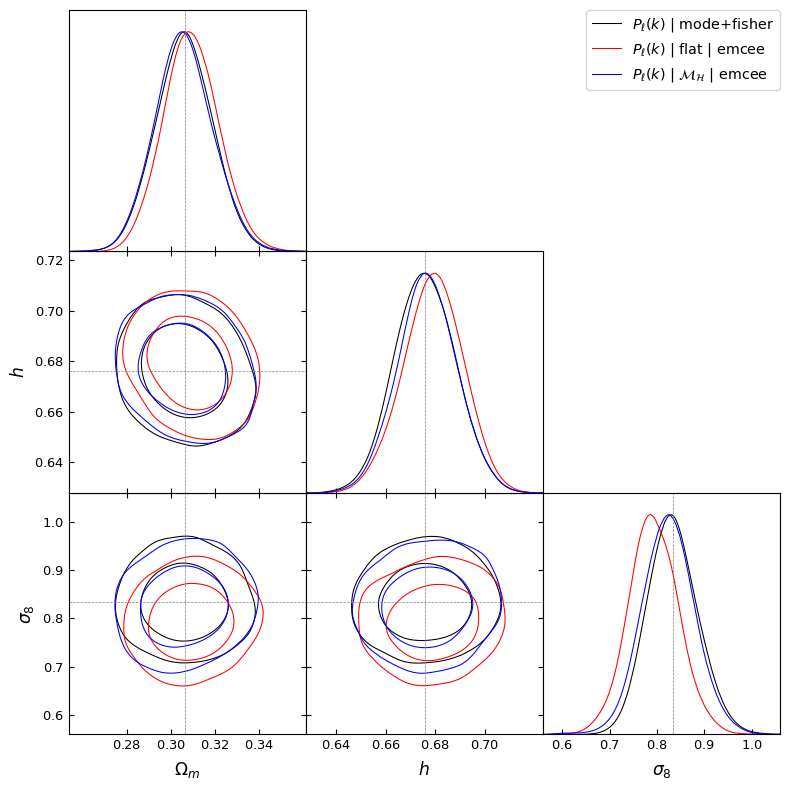

In [16]:
%matplotlib inline 
g = plots.get_subplot_plotter(width_inch=8)
g.triangle_plot([s_pk_fisher, s_pk_emcee, s_pk_H_emcee], cosmo_names, 
    filled=False,
    markers=cosmo_mode, 
    legend_labels=[r'$P_\ell(k)$ | mode+fisher', r'$P_\ell(k)$ | flat | emcee', r'$P_\ell(k)$ | $\mathcal{M}_\mathcal{H}$ | emcee']
)
plt.tight_layout()
plt.show()

## **$P\!\!\!\!/+w_\ell$ analysis**
$k^{P\!\!\!\!/}_{\rm max}=0.3 \, h/{\rm Mpc}, k_{\rm max}^{w_{1/2}} = 0.2 / 0.1 \, h/{\rm Mpc}$, cf. [2110.00016](https://arxiv.org/abs/2110.00016)

In [17]:
likelihood_config.update({'with_wedge': True, 'wedge_type': 'PA-w1-w2'})
for sky in likelihood_config['sky'].keys(): likelihood_config['sky'][sky]['max'] = [0.30, 0.20, 0.10]
R = Run(run_config, likelihood_config, outdir, verbose=True)
R.c.update({'emulate': False, 'taylor': False}) # no emu nor Taylor when minimising to ensure accurate point estimates
mode_wk = R.run(minimizers=['minuit', 'minuit'], output=True, verbose=True) 
R.c.update({'emulate': True, 'taylor': True, 'debiasing': True, 'measure': False, 'hessian_type': 'H'}) 
samples_wk_H = R.run(samplers=['fisher', 'emcee'] , output=True, samplers_options=[{}, emcee_options], return_extras=True, verbose=True)

free_cosmo_name: ['omega_cdm', 'h', 'ln10^{10}A_s']
fiducial_cosmo: {'omega_b': 0.02235, 'omega_cdm': 0.12, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}
cosmo_prior: False
ext_probe: False
ext_loglkl: None
measure: False
taylor_measure: False
debiasing: False
hessian_type: None
vectorize: True
emulate: None
taylor: True
jax_jit: True
order: 3
boltzmann: Symbolic
'vectorize' or 'taylor' is True, setting 'jax_jit' to True
jax: on
reading data file: ../data/eftboss/boss_dr12_2pt.h5
-----------------------
sky: cmass_ngc
output: bPk
wedge (rotation of multipole): PA-w1-w2 | read wedge instead of multipole in the following
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.3, 0.2, 0.1]
coordinate (AP) distortion: on
survey mask: on
-----------------------
-----------------------
sky: cmass_sgc
output: bPk
wedge (rotation of multipole): PA-w1-w2 | read wedge instead of multipole in the following
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.

/Users/pierre/Library/Python/3.13/lib/python/site-packages/jax/_src/interpreters/mlir.py:1171: UserWarning: A large amount of constants were captured during lowering (3.19GB total). If this is intentional, disable this warning by setting JAX_CAPTURED_CONSTANTS_WARN_BYTES=-1. To obtain a report of where these constants were encountered, set JAX_CAPTURED_CONSTANTS_REPORT_FRAMES=-1.
  warnings.warn(message)


minimisation starts...
minimisation done in 172.425 sec.
min chi2: 192.688, ndata: 212, dof: 192, p-value: 0.472
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.114 0.681 3.033 1.922 0.31  2.112 1.375 1.927 1.21  1.974 2.014]
----- minimisation with minuit -----
starting from previously found best-fit
minimisation starts...
minimisation done in 39.243 sec.
min chi2: 192.688, ndata: 212, dof: 192, p-value: 0.472
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.114 0.681 3.033 1.922 0.31  2.112 1.375 1.927 1.21  1.974 2.014]
----- sampling with fisher -----
Emulator: on
Taylor: expanding cosmology-dependent correlator pieces...
Taylor: best-fit values found --- using them as fiducials
Taylor: derivatives up to order 3 computed in 28.565 sec.
starting from previously found best-fit
sampling starts...
sampling done in 7.774 sec.
----- sampling with emcee -----
Taylor

100%|██████████| 8000/8000 [00:37<00:00, 212.68it/s]


autocorr time:  [ 81.  93. 130. 134. 124. 128. 121. 125.  89. 131.  88.]
sampling done in 39.201 sec.


## $\xi_\ell(s)$ analysis

$s_{\rm min} = 20 \, \textrm{Mpc}/h$, cf. [2110.07539](https://arxiv.org/abs/2110.07539)

Currently slower as not being emulated

In [18]:
likelihood_config.update({'output': 'bCf', 'with_wedge': False, 'with_stoch': False, 'with_nnlo_counterterm': False, 
    'with_emu': False}) # disabling emulators until they becomes available for \xi...
for sky in likelihood_config['sky'].keys(): 
    likelihood_config['sky'][sky]['max'] = [200. ,200., 200.] # Mpc/h
    likelihood_config['sky'][sky]['min'] = [20. ,20., 20.] # Mpc/h
for b in ['ce0', 'ce1', 'ce2', 'cr4', 'cr6']:
    likelihood_config['eft_prior'][b]['type'] = 'unvaried'

R = Run(run_config, likelihood_config, outdir, verbose=True)
R.c.update({'emulate': False, 'taylor': False}) # no emu nor Taylor when minimising to ensure accurate point estimates
mode_xi = R.run(minimizers=['minuit', 'minuit'], output=True, verbose=True) 
R.c.update({'emulate': False, 'taylor': True, 'debiasing': True, 'measure': False, 'hessian_type': 'H'}) # no emulator yet for \xi_\ell
samples_xi_H = R.run(samplers=['fisher', 'emcee'] , output=True, samplers_options=[{}, emcee_options], return_extras=True, verbose=True)

free_cosmo_name: ['omega_cdm', 'h', 'ln10^{10}A_s']
fiducial_cosmo: {'omega_b': 0.02235, 'omega_cdm': 0.12, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}
cosmo_prior: False
ext_probe: False
ext_loglkl: None
measure: False
taylor_measure: False
debiasing: False
hessian_type: None
vectorize: True
emulate: None
taylor: True
jax_jit: True
order: 3
boltzmann: Symbolic
'vectorize' or 'taylor' is True, setting 'jax_jit' to True
jax: on
reading data file: ../data/eftboss/boss_dr12_2pt.h5
-----------------------
sky: cmass_ngc
output: bCf
multipole: 3
min bound (per multipole): [20.0, 20.0, 20.0]
max bound (per multipole): [200.0, 200.0, 200.0]
coordinate (AP) distortion: on
survey mask only for bPk, not bCf, disabling it
-----------------------
-----------------------
sky: cmass_sgc
output: bCf
multipole: 3
min bound (per multipole): [20.0, 20.0, 20.0]
max bound (per multipole): [200.0, 200.0, 200.0]
coordinate (AP) distortion: on
-----------------------
-----------------------
sky: lowz_ng

/Users/pierre/Library/Python/3.13/lib/python/site-packages/jax/_src/interpreters/mlir.py:1171: UserWarning: A large amount of constants were captured during lowering (2.58GB total). If this is intentional, disable this warning by setting JAX_CAPTURED_CONSTANTS_WARN_BYTES=-1. To obtain a report of where these constants were encountered, set JAX_CAPTURED_CONSTANTS_REPORT_FRAMES=-1.
  warnings.warn(message)


minimisation starts...
minimisation done in 378.592 sec.
min chi2: 465.803, ndata: 432, dof: 417, p-value: 0.049
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.111 0.684 3.175 1.766 0.138 1.888 0.76  1.781 0.946 1.791 1.129]
----- minimisation with minuit -----
starting from previously found best-fit
minimisation starts...
minimisation done in 85.033 sec.
min chi2: 465.803, ndata: 432, dof: 417, p-value: 0.049
bestfit ['omega_cdm', 'h', 'ln10^{10}A_s', 'b1_1', 'c2_1', 'b1_2', 'c2_2', 'b1_3', 'c2_3', 'b1_4', 'c2_4']: [0.111 0.684 3.175 1.766 0.138 1.888 0.76  1.781 0.946 1.791 1.129]
----- sampling with fisher -----
Taylor: expanding cosmology-dependent correlator pieces...
Taylor: best-fit values found --- using them as fiducials
Taylor: derivatives up to order 3 computed in 442.468 sec.
starting from previously found best-fit
sampling starts...
sampling done in 4.109 sec.
----- sampling with emcee -----
Taylor expansion f

100%|██████████| 8000/8000 [00:35<00:00, 222.49it/s]


autocorr time:  [ 93. 102.  83. 101. 104.  78. 111.  75.  90. 119. 127.]
sampling done in 37.185 sec.


## **Results**

In [19]:
s_wk_H_emcee = get_MCSamples(samples_wk_H, sampler='emcee')
s_xi_H_emcee = get_MCSamples(samples_xi_H, sampler='emcee')

Removed no burn in
Removed no burn in


In [32]:
all_modes = [get_derived(mode['minuit']['bestfit'][cosmo_indices]) for mode in [mode_pk, mode_wk, mode_xi]]
all_samples = [s_pk_H_emcee, s_wk_H_emcee, s_xi_H_emcee]
all_labels = [
        r'$P_\ell(k)$ | $\mathcal{M}_\mathcal{H}$ | $k_{\rm max}^\ell = 0.20 \, h/{\rm Mpc}$', 
        r'$P\!\!\!/(k)+w_\ell(k)$ | $\mathcal{M}_\mathcal{H}$ | $k_{\rm max}^{P\!\!\!/} = 0.30 \, h/{\rm Mpc}$',
        r'$\xi_\ell(s)$ | $\mathcal{M}_\mathcal{H}$ | $s_{\rm min}^\ell = 20 \, {\rm Mpc}/h$', 
        ]
all_labels_simple = ['P_ell(k)', 'w_ell(k)', 'xi_ell(s)']

Triangle plots

/var/folders/ln/m6nw7b5d1h11560h9hnwzdf00000gp/T/ipykernel_74187/2884878193.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


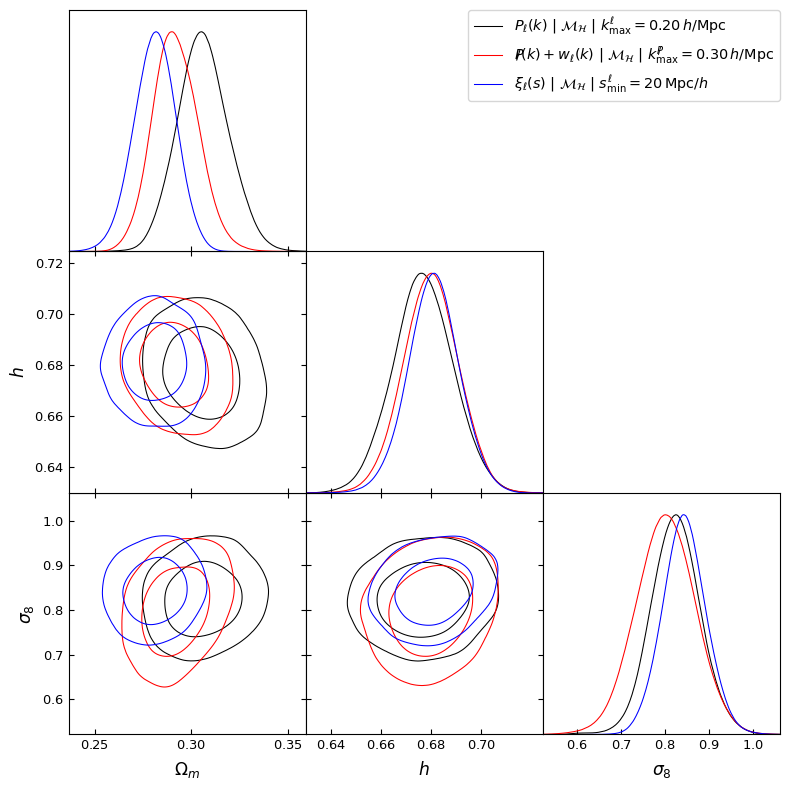

In [21]:
%matplotlib inline 
g = plots.get_subplot_plotter(width_inch=8)
g.triangle_plot(all_samples, cosmo_names, 
    filled=False,
    legend_labels=all_labels
)
plt.tight_layout()
plt.show()


68\%CL

In [33]:
print(f"{'Param':<8} " + "  ".join(f"{r'%s (mode mean -σ +σ)':>26}" % label for label in all_labels_simple))
print('-' * (8 + len(all_samples) * 28))

for i, p in enumerate(cosmo_names):
    row = f"{p:<8} "
    for m, s in zip(all_modes, all_samples):
        stats = s.getMargeStats().parWithName(p)
        mu, std = stats.mean, stats.err
        row += f"{m[i]:8.3f} {mu:8.3f} {mu - std:6.3f} {std - mu:6.3f}   "
    print(row)

Param          P_ell(k) (mode mean -σ +σ)        w_ell(k) (mode mean -σ +σ)        xi_ell(s) (mode mean -σ +σ)
--------------------------------------------------------------------------------------------
Omega_m     0.306    0.306  0.293 -0.293      0.293    0.292  0.280 -0.280      0.285    0.281  0.270 -0.270   
h           0.676    0.677  0.665 -0.665      0.681    0.680  0.669 -0.669      0.684    0.681  0.671 -0.671   
sigma_8     0.833    0.824  0.768 -0.768      0.794    0.801  0.734 -0.734      0.838    0.844  0.794 -0.794   
